In [2]:
import pandas as pd

In [38]:
import matplotlib.pyplot as plt

In [39]:
import seaborn as sns

In [40]:
%matplotlib inline

In [6]:
table = pd.read_csv('train (2).csv')
table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Видим, что не везде указан возраст пассажира. А также проблемы с данными по каютам.
Удалять их как-то не хочется, т.к. таблица станет значительно меньше и результаты анализа новой таблицы станут нерепрезентативными.

Столбцы изначально названы так, что переименовывать их не нужно, можно сразу работать.

Для начала можно посмотреть, сколько процентов пассажиров выжило.
Заявлено, что там только значения 0 или 1. Проверим, так ли это:

In [8]:
table.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Ну и сразу из этого результата видно, что количество выживших 342. Посмотрим, сколько это в процентах:

In [10]:
table.Survived.value_counts(normalize=True).mul(100).round(2)

0    61.62
1    38.38
Name: Survived, dtype: float64

In [ ]:
Посмотрим, сколько выживших в каждом классе:

In [14]:
table.groupby('Pclass',as_index=False).agg({'Survived':'sum'}).sort_values('Survived',ascending=False)

,Pclass,Survived
0,1,136
2,3,119
1,2,87


Видим, что в абсолютном выражении больше всего выживших 1 класса, а меньше всего выжило пассажиров 2 класса.

Посмотрим, сколько процентов выживших в каждом классе:

In [18]:
table.groupby('Pclass').Survived.value_counts(normalize=True).mul(100).round(2)

Pclass  Survived
1       1           62.96
        0           37.04
2       0           52.72
        1           47.28
3       0           75.76
        1           24.24
Name: Survived, dtype: float64

Видим, что в процентном соотношении выжило больше пассажиров 2 класса:

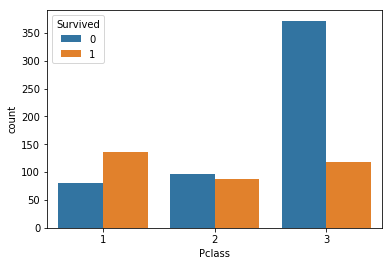

In [53]:
sns.countplot(data=table, x='Pclass', hue='Survived')

А что с возрастом и полом выживших?

In [19]:
table.groupby('Sex',as_index=False).agg({'Survived':'sum'}).sort_values('Survived',ascending=False)

,Sex,Survived
0,female,233
1,male,109


Видим, что женщин выжило почти в 2 раза больше, чем мужчин:

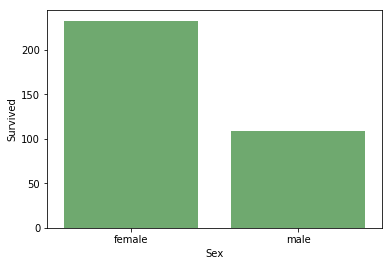

In [67]:
tt = table.groupby('Sex',as_index=False).agg({'Survived':'sum'}).sort_values('Survived',ascending=False)
sns.barplot(data = tt, x='Sex', y='Survived',color='green',alpha=0.6)

Теперь про возраст. Тут проблемы с данными (у многих не указан), но попробуем проанализировать хотя бы те, что есть.

In [20]:
table.groupby('Age',as_index=False).agg({'Survived':'sum'}).sort_values('Survived',ascending=False)

,Age,Survived
31,24.00,15
28,22.00,11
35,27.00,11
48,36.00,11
47,35.00,11
39,30.00,10
42,32.00,9
24,19.00,9
23,18.00,9
41,31.00,8


Не очень понятно. Попробуем сделать нагляднее:

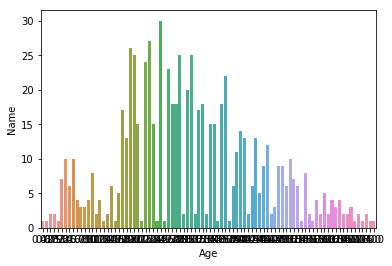

In [49]:
ag = table.groupby('Age',as_index=False).agg({'Name':'count'}).sort_values('Name',ascending=False)
sns.barplot(data = ag, x='Age', y='Name')

Выше график, который показывает распределение пасажиров по возрастам.
Ниже график, который показывает распределение выживших пассажиров по возрастам.
Видимой зависимости "возраст-выживание" мы не наблюдаем.

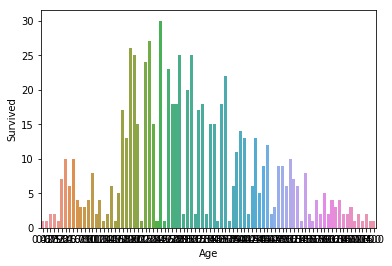

In [48]:
aa = table.groupby('Age',as_index=False).agg({'Survived':'sum'}).sort_values('Survived',ascending=False)
sns.barplot(data = aa, x='Age', y='Survived')

Посмотрим, а сколько вообще там было детей (считаем ребенком человека до 18 лет):

In [23]:
len(table[table['Age']<18])

113

Людей 18 лет и старше:

In [25]:
len(table[table['Age']>=18])

601

Важно помнить, что столбец "Возраст" у нас не полностью заполнен данными, для 177 человек возраст не указан.
В том числе и поэтому четких выводов по возрастам мы сделать не можем.

Далее посмотрим, что тут ещё может быть:

In [26]:
table.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Из описания таблицы видно, что кто-то вообще ехал бесплатно. Почему?
Может, совсем мелкие дети?
Посмотрим:

In [32]:
len(table[table['Fare']==0])

15

In [34]:
table.sort_values(by='Fare').head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S


Непонятно, что там у них происходило. Бесплатники все мужского пола и все, кроме одного, погибли. Возраст либо не указан вовсе, либо соотвествует взрослому человеку.
Зато они все из Саутгемптона.
Впрочем, как и большинство пассажиров:

In [36]:
table.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64